# Laboratorium 10: Klasyfikacja i regresja w keras

In [1]:
import numpy as np
import pandas as pd

## Klasyfikacja

Zbior danych *Fashion MNIST*

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

---
Przeskalowanie wrtosci z 0-255 do 0-1

In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0

---
Przykladowy rysunek do klasyfikacji

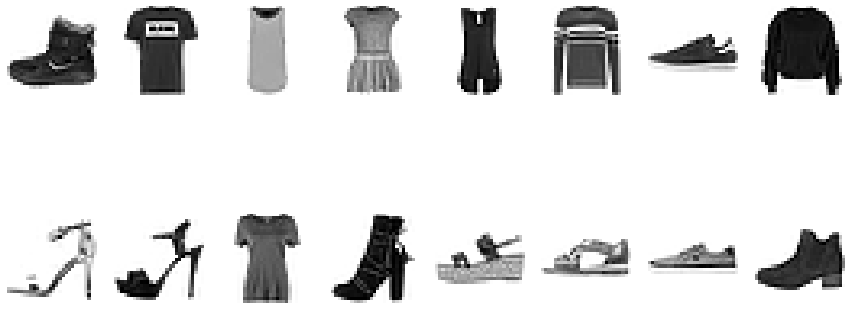

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))
rows, columns = 2,8
for i in range(16):
    fig.add_subplot(rows, columns, i+1)
    # showing image
    plt.imshow(X_train[i], cmap="binary")
    plt.axis('off')

---
lista nazw kategorii

In [5]:
 class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
               "sandał", "koszula", "but", "torba", "kozak"]

---
Model sekwencyjny zawierający warstwy gęste:
* warstwę spłaszczającą dane, tj. przekształcającą z postaci (28,28) do postaci (784,), 
* warstwę ukrytą zawierającą 300 neuronów,
* warstwę ukrytą zawierającą 100 neuronów,
* warstwę wyjściową odpowiednią dla problemu klasyfikacji przy 10 klasach.

In [6]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

2022-05-28 09:21:43.533176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---
podsumowanie i graficzna reprezentacja struktury sieci

In [7]:
model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


---
Skompiluj model, podając rzadką entropię krzyżową jako funkcję straty, SGD jako opymalizator i dokładność jako metrykę.

In [8]:
model.compile(loss= "sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

---
tesordboard:

In [9]:
def get_run_logdir(directory): 
    import time
    import os
    root_logdir = os.path.join(os.curdir, directory)
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [10]:
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir("classifier_logs"))

---
zbior walidacyjny i przyuczenie 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [12]:
history = model.fit(X_train, y_train, epochs=20,
                    callbacks=[tensorboard_cb],
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.7105 - accuracy: 0.7662 - val_loss: 0.5243 - val_accuracy: 0.8242
Epoch 2/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4891 - accuracy: 0.8289 - val_loss: 0.4697 - val_accuracy: 0.8338
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4456 - accuracy: 0.8451 - val_loss: 0.4430 - val_accuracy: 0.8422
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4177 - accuracy: 0.8533 - val_loss: 0.4774 - val_accuracy: 0.8262
Epoch 5/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3975 - accuracy: 0.8605 - val_loss: 0.4245 - val_accuracy: 0.8482
Epoch 6/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3827 - accuracy: 0.8655 - val_loss: 0.4449 - val_accuracy: 0.8467
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3691 - accuracy: 0.8700 - val_loss: 0.3599 - val_accuracy:

1/1 [==============================] - 0s 120ms/step
Prediction: but
Confidence: 0.95907766
Truth: but


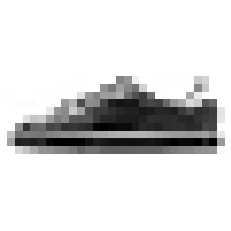

In [13]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [14]:
model.save('fashion_clf.h5')

## Regresja

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
housing = fetch_california_housing()

Zbiory: uczacy, walidacyjny i tstowy

In [16]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full, random_state=42)

Przeskaluj wszystkie zbiory cech, kalibrując funkcję normalizacyjną do zbioru uczącego:

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model, zawierający jedną warstwę ukrytą z 30 neuronami, odpowiedni do regresji jed- nego parametru wyjściowego obecnego w zbiorze danych. Skompiluj go używając błędu średniok- wadratwego jako funkcji straty i SGD jako optymalizatora.

In [18]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [19]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f82e4e9a670>>

In [20]:
model.compile(loss= "mean_squared_error",
              optimizer="sgd",
              metrics=["mse"])

*early stopping*

In [21]:
es = tf.keras.callbacks.EarlyStopping(patience=5,
                                      min_delta=0.01,
                                      verbose=1)
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir("regresor_logs"))

In [22]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid,y_valid),
                    callbacks=[es,tensorboard_cb])

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 0.8809 - mse: 0.8809 - val_loss: 14.1815 - val_mse: 14.1815
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5251 - mse: 0.5251 - val_loss: 2.7083 - val_mse: 2.7083
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4690 - mse: 0.4690 - val_loss: 0.4016 - val_mse: 0.4016
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4224 - mse: 0.4224 - val_loss: 0.3902 - val_mse: 0.3902
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4149 - mse: 0.4149 - val_loss: 0.3842 - val_mse: 0.3842
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4075 - mse: 0.4075 - val_loss: 0.3773 - val_mse: 0.3773
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4200 - mse: 0.4200 - val_loss: 0.3725 - val_mse: 0.3725
Epoch 8/100
363/363 [==============================] - 1s 3ms/step 

In [23]:
model.save('reg_housing_1.h5')

dodatkowy eksperyment #1

In [24]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation = "relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [25]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f82c3f9a370>>

In [26]:
model.compile(loss= "mean_squared_error",
              optimizer="sgd",
              metrics=["mse"])

*early stopping*

In [27]:
es = tf.keras.callbacks.EarlyStopping(patience=5,
                                      min_delta=0.01,
                                      verbose=1)
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir("regresor_logs"))

In [28]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid,y_valid),
                    callbacks=[es,tensorboard_cb])

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 0.7500 - mse: 0.7500 - val_loss: 2.0716 - val_mse: 2.0716
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5070 - mse: 0.5070 - val_loss: 6.0808 - val_mse: 6.0808
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4382 - mse: 0.4382 - val_loss: 17.3476 - val_mse: 17.3476
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7045 - mse: 0.7045 - val_loss: 2.8587 - val_mse: 2.8587
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4508 - mse: 0.4508 - val_loss: 2.2499 - val_mse: 2.2499
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4594 - mse: 0.4594 - val_loss: 0.3634 - val_mse: 0.3634
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3845 - mse: 0.3845 - val_loss: 0.3732 - val_mse: 0.3732
Epoch 8/100
363/363 [==============================] - 1s 2ms/step 

In [29]:
model.save('reg_housing_2.h5')

Dodatkowy eksperyment #2

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(200, activation = "relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(1)
])

In [31]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f82c4a3deb0>>

In [32]:
model.compile(loss= "mean_squared_error",
              optimizer="sgd",
              metrics=["mse"])

*early stopping*

In [33]:
es = tf.keras.callbacks.EarlyStopping(patience=5,
                                      min_delta=0.01,
                                      verbose=1)
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir("regresor_logs"))

In [34]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid,y_valid),
                    callbacks=[es,tensorboard_cb])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6728 - mse: 0.6728 - val_loss: 3.2730 - val_mse: 3.2730
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4426 - mse: 0.4426 - val_loss: 5.6006 - val_mse: 5.6006
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4426 - mse: 0.4426 - val_loss: 2.9240 - val_mse: 2.9240
Epoch 4/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3921 - mse: 0.3921 - val_loss: 12.8733 - val_mse: 12.8733
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4666 - mse: 0.4666 - val_loss: 2.8714 - val_mse: 2.8714
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3781 - mse: 0.3781 - val_loss: 2.2018 - val_mse: 2.2018
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3700 - mse: 0.3700 - val_loss: 0.4278 - val_mse: 0.4278
Epoch 8/100
363/363 [==============================] - 1s 2ms/step 

In [35]:
model.save('reg_housing_3.h5')